## Agenda for Day 7
---
1. Q/A and Advanced Pandas concepts
    - join
    - merge
    - concat
    - datetime
2. Matplotlib Foundations
3. Plot graphs using matplotlib
4. Plot graphs directly from pandas
5. Intergate both plots
    - Custom plot with Pandas way of plot 

6. Explore some more visualization tools
    - seaborn 
    - plot.ly
    
---

- Afternoon
    - Workshop
    - Project discussion

In [35]:
import pandas as pd
customers = pd.DataFrame({
    "name": ['bala','ken','tom'],
    "cid": [1000,1001,1002],
    "contact": [90909090,90909091,879797878]
})

In [36]:
customers

,name,cid,contact
0,bala,1000,90909090
1,ken,1001,90909091
2,tom,1002,879797878


In [37]:
orders = pd.DataFrame({
    "order_id"   : [11,  12,  13,  14,    15],
    "customer_id": [1000,1000,1001, 1001, 1002 ],
    "order_item" : ["FairPrice Bread - Wholemeal", "Italy Ambrosia Apple", "Tiger Can Beer - Lager", "Milo Chocolate Malt UHT Packet Drink", "Coca-Cola Can Drink - Classic"],
    "quantity"   : [1,     1,                 1,                        1,                                      2],
    "price"   :    [1.75,     2.95,                 48.50,                    11.50,                                  16.95],
    "subtotal"   : [1.75,     2.95,                 48.50,                    11.50,                                  33.9]
})

In [26]:
orders

,order_id,customer_id,order_item,quantity,price,subtotal
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75
1,12,1000,Italy Ambrosia Apple,1,2.95,2.95
2,13,1001,Tiger Can Beer - Lager,1,48.50,48.50
3,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50
4,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90


In [9]:
customers

,name,cid,contact
0,bala,1000,90909090
1,ken,1001,90909091
2,tom,1002,879797878


In [18]:
# customers.loc[customers.cid == 1000, 'name'].values[0]

'bala'

In [27]:
def func(cid):
    #return name for this cid
    return customers.loc[customers.customer_id == cid, 'name'].values[0]

orders["name"]= orders.customer_id.apply(func)

In [10]:
# orders - customer name...

In [31]:
customers.head()

,name,customer_id,contact
0,bala,1000,90909090
1,ken,1001,90909091
2,tom,1002,879797878


In [30]:
orders.head()

,order_id,customer_id,order_item,quantity,price,subtotal
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75
1,12,1000,Italy Ambrosia Apple,1,2.95,2.95
2,13,1001,Tiger Can Beer - Lager,1,48.50,48.50
3,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50
4,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90


In [34]:
# orders.join(customers, on="customer_id", how="left", lsuffix='left_', )

,order_id,customer_idleft_,order_item,quantity,price,subtotal,name,customer_id,contact
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,NaN,NaN,NaN
1,12,1000,Italy Ambrosia Apple,1,2.95,2.95,NaN,NaN,NaN
2,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,NaN,NaN,NaN
3,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,NaN,NaN,NaN
4,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,NaN,NaN,NaN


In [47]:
orders2 = orders.copy()

customers2 = customers.copy()
customers2['customer_id']= customers2.cid
del customers2['cid']

In [51]:
orders2.join(customers2, on="customer_id", how="left", lsuffix='L_', rsuffix='R_')

,order_id,customer_idL_,order_item,quantity,price,subtotal,name,contact,customer_idR_
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,NaN,NaN,NaN
1,12,1000,Italy Ambrosia Apple,1,2.95,2.95,NaN,NaN,NaN
2,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,NaN,NaN,NaN
3,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,NaN,NaN,NaN
4,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,NaN,NaN,NaN


## merging dataframes

In [52]:
# <df>.merge(<df2>,  how="left|right|inner|outer", on="if same column name on both tables", 
#                                                   left_on="column name",
#                                                   right_on="comumn name")

In [53]:
orders.merge(customers, how='inner', left_on="customer_id", right_on="cid"  )

,order_id,customer_id,order_item,quantity,price,subtotal,name,cid,contact
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,bala,1000,90909090
1,12,1000,Italy Ambrosia Apple,1,2.95,2.95,bala,1000,90909090
2,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,ken,1001,90909091
3,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,ken,1001,90909091
4,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,tom,1002,879797878


In [54]:
customers

,name,cid,contact
0,bala,1000,90909090
1,ken,1001,90909091
2,tom,1002,879797878


In [65]:
customers["customer_id"]= customers.cid
del customers['cid']

In [66]:
customers

,name,contact,customer_id
0,bala,90909090,1000
1,ken,90909091,1001
2,tom,879797878,1002


In [61]:
customers2["name"]=customers2.name.str.upper()

In [67]:
customers2

,name,contact,customer_id
0,BALA,90909090,1000
1,KEN,90909091,1001
2,TOM,879797878,1002


In [69]:
all_customers = pd.concat([customers, customers2],axis=0)
all_customers.reset_index(drop=True)

,name,contact,customer_id
0,bala,90909090,1000
1,ken,90909091,1001
2,tom,879797878,1002
3,BALA,90909090,1000
4,KEN,90909091,1001
5,TOM,879797878,1002


In [79]:
customers_card_info= customers.copy()

In [80]:
customers_card_info["card_number"] =customers_card_info['contact']
del customers_card_info['contact']

In [81]:
del customers_card_info['name']

In [82]:
customers_card_info.card_number = customers_card_info.card_number * 1000

In [83]:
customers_card_info

,customer_id,card_number
0,1000,90909090000
1,1001,90909091000
2,1002,879797878000


In [84]:
customers

,name,contact,customer_id
0,bala,90909090,1000
1,ken,90909091,1001
2,tom,879797878,1002


In [85]:
customers.merge(customers_card_info, on="customer_id")

,name,contact,customer_id,card_number
0,bala,90909090,1000,90909090000
1,ken,90909091,1001,90909091000
2,tom,879797878,1002,879797878000


In [88]:
pd.concat([customers, customers_card_info], axis=1)

,name,contact,customer_id,customer_id,card_number
0,bala,90909090,1000,1000,90909090000
1,ken,90909091,1001,1001,90909091000
2,tom,879797878,1002,1002,879797878000


In [89]:
# pd.concat
# df.merge(otherdf)

In [96]:
res = orders.groupby("customer_id")['subtotal'].sum()
res = pd.DataFrame(res).reset_index()
res

,customer_id,subtotal
0,1000,4.7
1,1001,60.0
2,1002,33.9


In [102]:
final_amount_spent = res.merge(customers, on="customer_id")
data = final_amount_spent.loc[:,['name','subtotal']]
data

,name,subtotal
0,bala,4.7
1,ken,60.0
2,tom,33.9


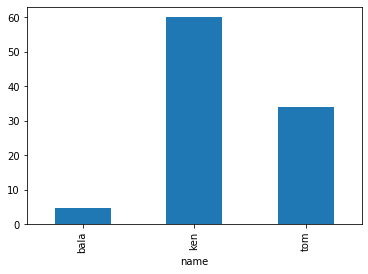

In [116]:
data.groupby("name")['subtotal'].sum().plot("bar")

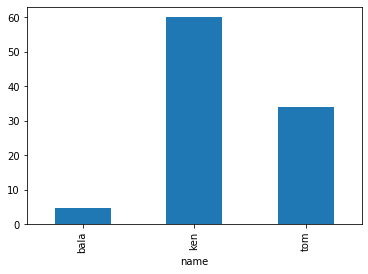

In [113]:
# data to series
# series.plot
data.set_index("name").subtotal.plot("bar")

In [122]:
# how many items someone bought
out = orders.groupby("customer_id")['order_id'].count()
out_dict = out.to_dict()
out_dict

{1000: 2, 1001: 2, 1002: 1}

In [126]:
customers['order_count'] = customers.customer_id.map(out_dict)
customers

,name,contact,customer_id,order_count
0,bala,90909090,1000,2
1,ken,90909091,1001,2
2,tom,879797878,1002,1


In [129]:
orders.to_excel("orders.xlsx", index=False)

In [135]:
orders.to_csv("orders_csv.csv", index=False)

In [136]:
orderscsv = pd.read_csv("orders_csv.csv")

In [137]:
orderscsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
order_id        5 non-null int64
customer_id     5 non-null int64
order_item      5 non-null object
quantity        5 non-null int64
price           5 non-null float64
subtotal        5 non-null float64
ordered_time    5 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 360.0+ bytes


In [133]:
orders = pd.read_excel("orders.xlsx")
# orders["order_item"]= pd.to_datetime(orders.ordered_time)

In [139]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
order_id        5 non-null int64
customer_id     5 non-null int64
order_item      5 non-null object
quantity        5 non-null int64
price           5 non-null float64
subtotal        5 non-null float64
ordered_time    5 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 360.0+ bytes


In [142]:
a = orders.ordered_time.dt

In [146]:
a.day_name()

0      Monday
1      Friday
2    Saturday
3      Sunday
4      Monday
Name: ordered_time, dtype: object

In [163]:
# a.week

In [148]:
orders["day"]=orders.ordered_time.dt.day_name()

In [149]:
orders

,order_id,customer_id,order_item,quantity,price,subtotal,ordered_time,day
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,2019-12-02,Monday
1,12,1000,Italy Ambrosia Apple,1,2.95,2.95,2020-01-03,Friday
2,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,2020-01-04,Saturday
3,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,2020-01-05,Sunday
4,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,2020-01-06,Monday


In [166]:
orders_with_date_indexed= orders.set_index("ordered_time")

In [167]:
orders_with_date_indexed

,order_id,customer_id,order_item,quantity,price,subtotal,day
ordered_time,,,,,,,
2019-12-02,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,Monday
2020-01-03,12,1000,Italy Ambrosia Apple,1,2.95,2.95,Friday
2020-01-04,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,Saturday
2020-01-05,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,Sunday
2020-01-06,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,Monday


In [174]:
orders_with_date_indexed.loc["2019 dec"]

,order_id,customer_id,order_item,quantity,price,subtotal,day
ordered_time,,,,,,,
2019-12-02,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,Monday


In [175]:
orders_with_date_indexed.loc["2020"]

,order_id,customer_id,order_item,quantity,price,subtotal,day
ordered_time,,,,,,,
2020-01-03,12,1000,Italy Ambrosia Apple,1,2.95,2.95,Friday
2020-01-04,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,Saturday
2020-01-05,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,Sunday
2020-01-06,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,Monday


In [176]:
orders_with_date_indexed.loc["01-2020"]

,order_id,customer_id,order_item,quantity,price,subtotal,day
ordered_time,,,,,,,
2020-01-03,12,1000,Italy Ambrosia Apple,1,2.95,2.95,Friday
2020-01-04,13,1001,Tiger Can Beer - Lager,1,48.50,48.50,Saturday
2020-01-05,14,1001,Milo Chocolate Malt UHT Packet Drink,1,11.50,11.50,Sunday
2020-01-06,15,1002,Coca-Cola Can Drink - Classic,2,16.95,33.90,Monday


In [170]:
orders["year"]= orders.ordered_time.dt.year

In [172]:
orders[orders.year == 2019]

,order_id,customer_id,order_item,quantity,price,subtotal,ordered_time,day,year
0,11,1000,FairPrice Bread - Wholemeal,1,1.75,1.75,2019-12-02,Monday,2019


In [177]:
# 1. using datetime as an index
# orders_with_date_indexed.loc["01-2020"]
# orders_with_date_indexed.loc["2020"]
# orders_with_date_indexed.loc["2019 dec"]


# 2. using datetime column to extract from `.dt.year` or .dt.<anything>

## Matplotlib Foundations

In [182]:
import matplotlib.pyplot as plt
import numpy as np

In [185]:
x = np.linspace(-2,2,5)
y = np.sin(x)

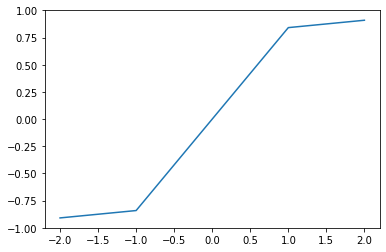

In [193]:
# create a figure
fig = plt.figure()

# plot something on that fig
plt.plot(x,y)

# show the figure
plt.show()

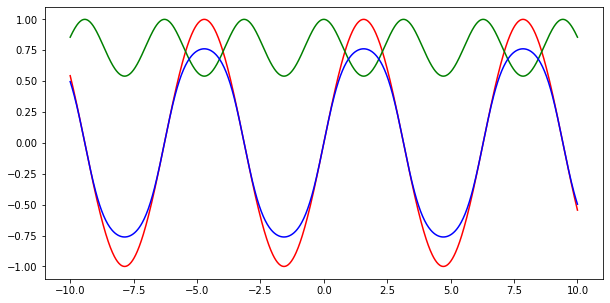

In [214]:
x = np.linspace(-10,10,1000)
y = np.sin(x)
# create a figure
fig = plt.figure(figsize=(10,5))

# customizing the axis
ax  = plt.axes() 
# ax.set_xlim(-10,10)

# plot something on that fig
# plt.plot(x,y)
ax.plot(x,y, color="red")
ax.plot(x,np.cos(y), "g")
ax.plot(x,np.tanh(y), "blue")
# show the figure
plt.show()

## Subplot

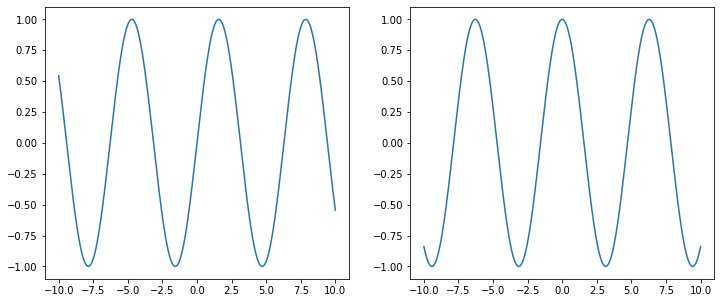

In [224]:
## creat a figure
fig, axs= plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# plot sin plot on ax[0]
axs[0].plot(x, np.sin(x))
# axs[0].set_xlim(-20,20)
# plot cos plot on ax[1]
axs[1].plot(x, np.cos(x))

plt.show()

In [295]:
## Create those functions
def relu(x):
    return np.array([max(v,0) for v in x])

def sigmoid(x):
    return 1/(1+np.exp(-x))

fns = [np.sin, np.cos, np.tanh, np.cosh, relu, sigmoid]
x = np.linspace(-10,10, 100)

In [296]:
np.sin

<ufunc 'sin'>

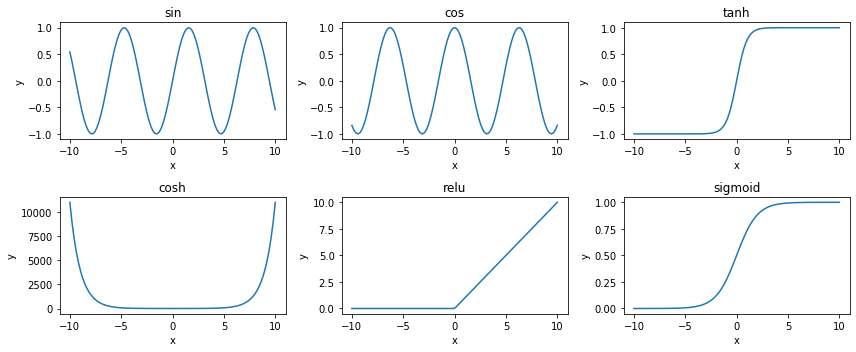

In [299]:
## create a subplot
fig,axs = plt.subplots(nrows=2, ncols=3, figsize=(12,5),)

## flatten
ax_flat = axs.flatten()

for index,function in enumerate(fns):
    y = function(x)
    ax_flat[index].set_title(function.__name__)
    ax_flat[index].set_xlabel("x")
    ax_flat[index].set_ylabel("y")
    ax_flat[index].plot(x,y)

fig.tight_layout() 

In [264]:
res = customers.merge(pd.DataFrame(orders.groupby('customer_id')['subtotal'].sum()).reset_index())[['name','subtotal']].set_index("name").subtotal
res

name
bala     4.7
ken     60.0
tom     33.9
Name: subtotal, dtype: float64

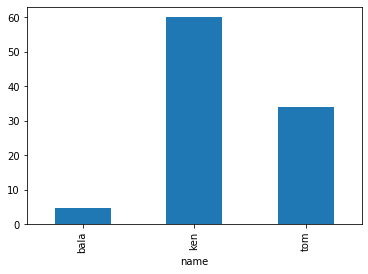

In [275]:
res.plot("bar")

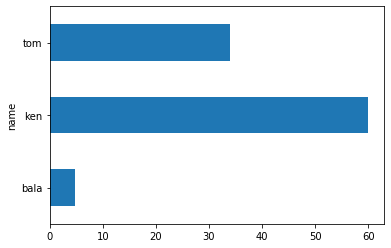

In [277]:
res.plot("barh")

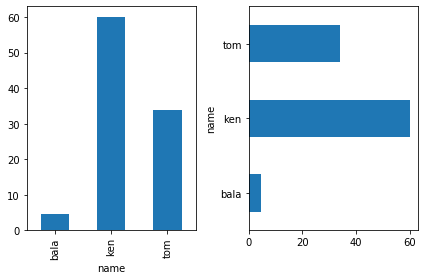

In [302]:
### bar, brah
fig, axs = plt.subplots(1,2)
ax_flat = axs.flatten()
res.plot("bar", ax=ax_flat[0])
res.plot("barh", ax=ax_flat[1])
# res.plot("bar")
# res.plot("barh")
fig.tight_layout()

In [287]:
# axs[0,1]

In [283]:
axs.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A82C4F2048>,
      dtype=object)

In [270]:
x = list(res.index)
y = list(res.values)

In [271]:
x

['bala', 'ken', 'tom']

In [272]:
y

[4.7, 60.0, 33.9]

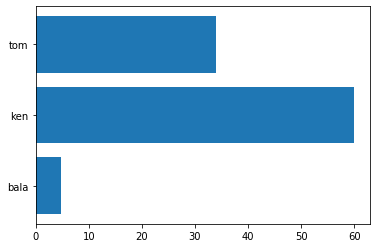

In [274]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset

x_pos = np.arange(len(x))
 
# Create horizontal bars
plt.barh(x_pos, y)
 
# Create names on the y-axis
plt.yticks(x_pos, x)
 
# Show graphic
plt.show()


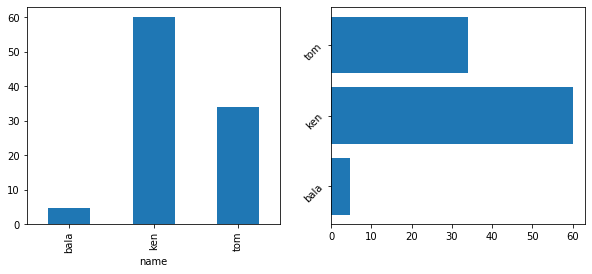

In [328]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

res.plot( "bar", ax=axs[0])

x = list(res.index)
y = list(res.values)
x_pos = np.arange(len(x))

axs[1].barh(x_pos, y)
axs[1].set_yticks(x_pos)
axs[1].set_yticklabels(x,rotation=45)
# Create names on the y-axis
# plt.yticks(x_pos, x)
# Show graphic

plt.savefig("output.png")

plt.show()


## Afternoon

# Demo on: seaborn

In [324]:
## Import seaborn library
import seaborn as sns

## Import some dataset
df =  sns.load_dataset("tips")

In [325]:
# sns.load_dataset??

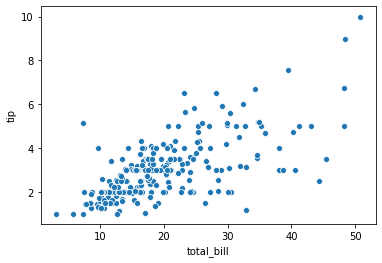

In [331]:
# df.head()
sns.scatterplot(x="total_bill", y="tip", data=df)

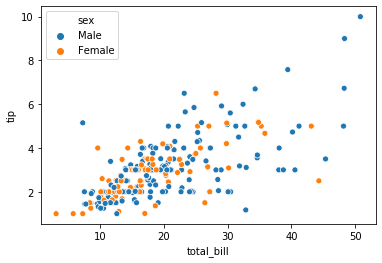

In [335]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="sex" )

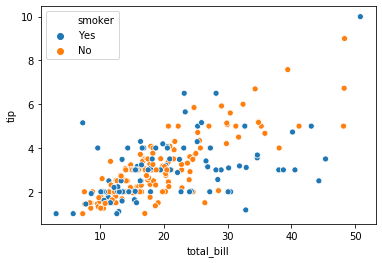

In [336]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="smoker" )

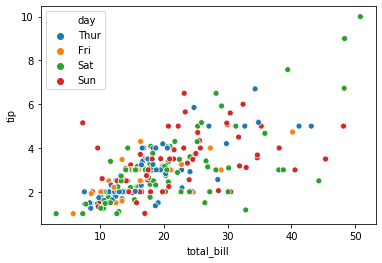

In [337]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="day" )

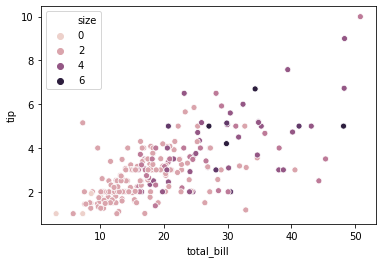

In [339]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="size" )

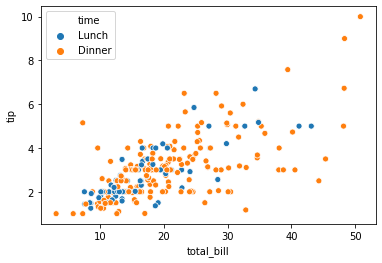

In [341]:
sns.scatterplot(x="total_bill", y="tip", data=df, hue="time" )

## Categorical plot

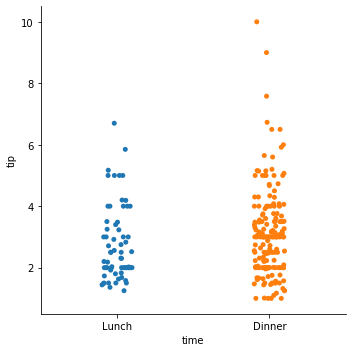

In [345]:
sns.catplot(x="time", y="tip", data=df)

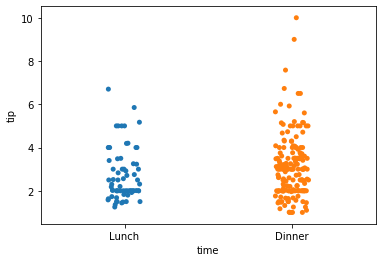

In [346]:
sns.stripplot(x="time", y="tip", data=df)

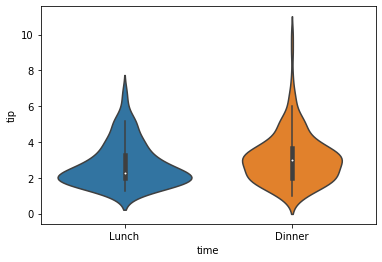

In [347]:
sns.violinplot(x="time", y="tip", data=df)

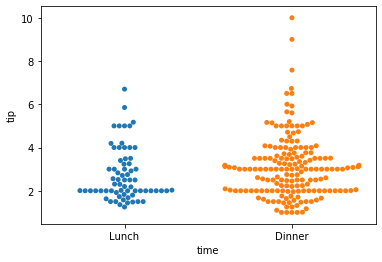

In [363]:
sns.swarmplot(x="time", y="tip", data=df)

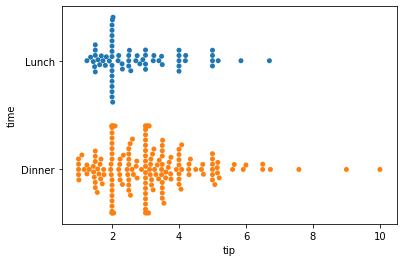

In [364]:
sns.swarmplot(y="time", x="tip", data=df)

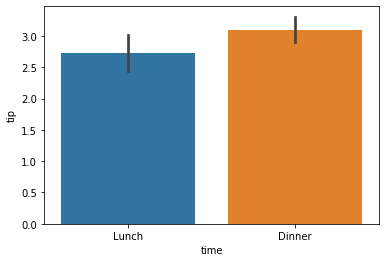

In [351]:
sns.barplot(x="time", y="tip", data=df, estimator=np.mean)

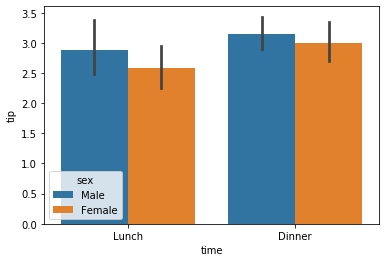

In [353]:
sns.barplot(x="time", y="tip", data=df, estimator=np.mean, hue="sex")

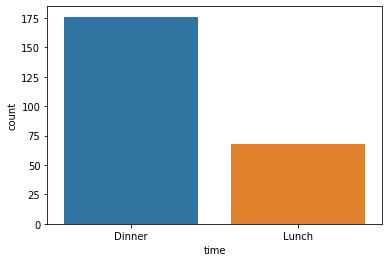

In [362]:
sns.countplot(x="time", order=["Dinner","Lunch"] ,data=df)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

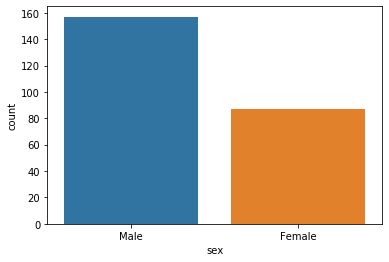

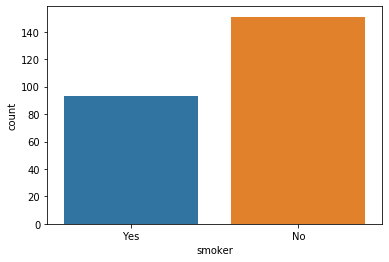

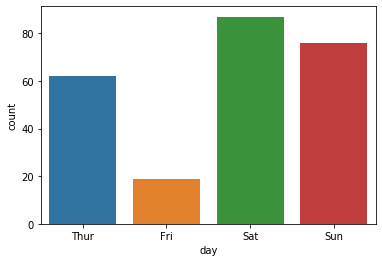

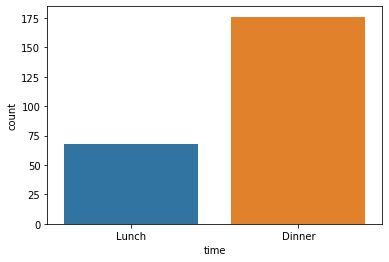

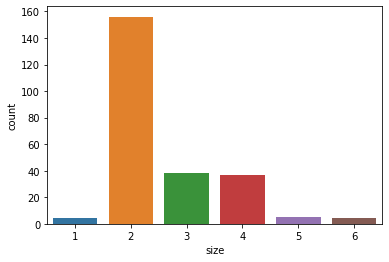

In [360]:
for col in df.columns:
    plt.figure()
    if len(df[col].unique()) < 20:
        sns.countplot(x=col, data=df)

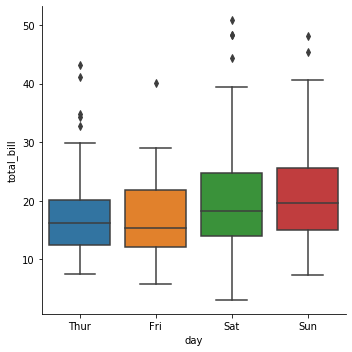

In [365]:
sns.catplot(x="day", y="total_bill", kind="box", data=df);

In [369]:
df.day.isin(['Sun','Sat']).sum()

163

In [370]:
df.shape

(244, 7)

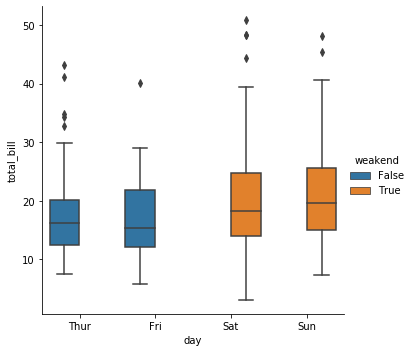

In [373]:
df['weakend'] = df.day.isin(['Sun','Sat'])
sns.catplot(x="day", y="total_bill", kind="box", data=df, hue="weakend")

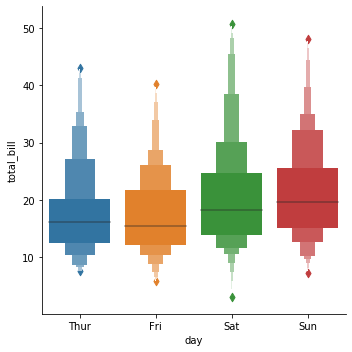

In [374]:
sns.catplot(x="day", y="total_bill", kind="boxen", data=df)

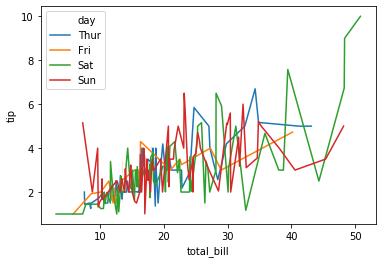

In [376]:
sns.lineplot(x="total_bill", y="tip",data=df, hue="day")

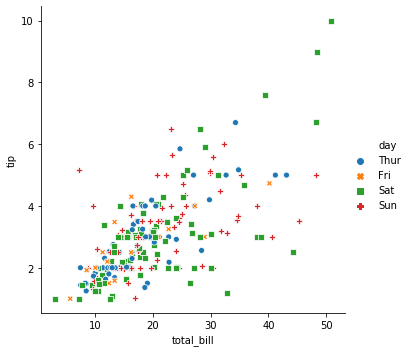

In [381]:
sns.relplot(x="total_bill", y="tip",data=df, hue="day", style="day")

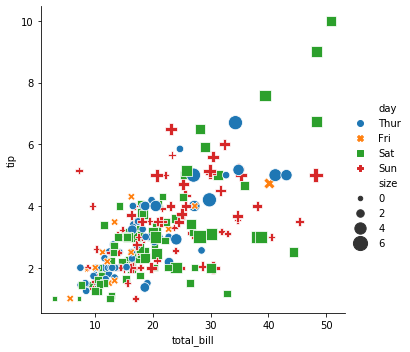

In [388]:
sns.relplot(x="total_bill", y="tip",data=df, hue="day", style="day", size="size",sizes=(20, 200))

In [389]:
import numpy as np, pandas as pd; plt.close("all")
index = pd.date_range("1 1 2000", periods=100,freq="m", name="date")
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])

In [400]:
# wide_df

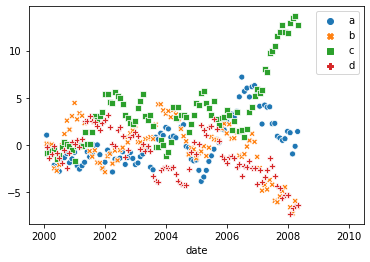

In [391]:
ax = sns.scatterplot(data=wide_df)

In [398]:
# sns.scatterplot(df.iloc[:,:2])

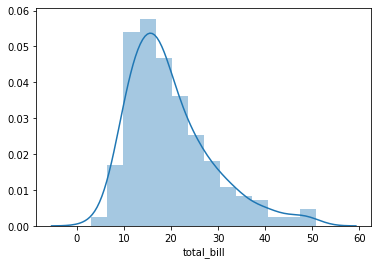

In [401]:
sns.distplot(df.total_bill)

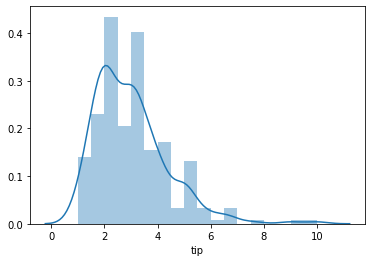

In [402]:
sns.distplot(df.tip)

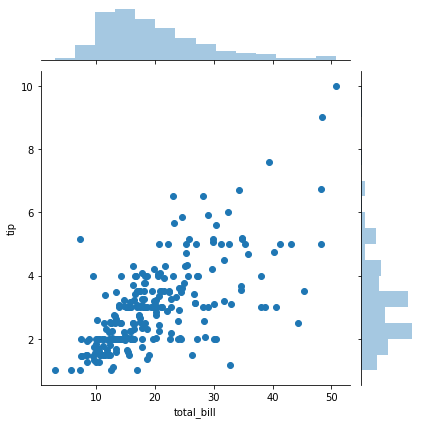

In [403]:
sns.jointplot(x="total_bill", y="tip", data=df);

## plot.ly

In [404]:
import plotly

In [405]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [406]:
init_notebook_mode(connected=True)

In [418]:
tmp = df[['total_bill','tip']].rename(columns={"total_bill":"x",  "tip": "y"})
tmp.head()

,x,y
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [422]:
# data_dct= {"x": [1, 2, 3], "y": [3, 1, 6]}
data_dct = tmp.to_dict('list')
iplot([data_dct])

In [426]:
v = df.groupby("day")['tip'].mean()

In [427]:
fig = go.Figure(
    data=[go.Bar(x=v.index, y=v.values)],
    layout=go.Layout(
        title=go.layout.Title(text="A Bar Chart")
    )
)
fig.show()